# Traitement d'images satellitaires

## Enoncé :
Le traitement d’image satellitaire recouvre l’ensemble des techniques consistant à modifier
une image dont le but de faciliter son interprétation ou d’d’extraire des informations d’ordre
quantitatif.
L'objectif de TP3 est implémenté quelques méthodes de traitement d’image satellitaire telles
que le rehaussement de contours, la segmentation et la classification automatique (en anglais
clustering).
Pour l'application nous allons utiliser une partie (sa taille 1200 x1200) de l’images satellitaire,
cette image est acquise par le satellite LANDSAT 7 ETM+ (Enhanced Thematic Mapper plus) des
zones côtières de Sumatra, en Indonésie, la date d'acquisition est 14 Mai 2002. L’image est une
composition colorée avec trois canaux : bandes de ETM4, ETM3 et ETM2, sa taille en pixels
5760x7200 et elle contient les différentes classes suivantes : la végétation apparaît en rouge,
rose et marron, l'eau apparaît bleue au noir, les zones urbaines et non végétales apparaissent
en bleu-vert et gris.

--------------------------------------------------------------------------------------------------

Etape 1 : Rehaussement de contours

Le but de la détection de contours est de repérer les points d’une image numérique qui
correspondent à un changement brutal de l’intensité lumineuse. Ces changements de
propriétés de l’image traduisent en général des événements importants ou des formes qu’il est
important de détecter. Certaines méthodes de détection de contours utilisent des filtres
(linéaires ou pas), qui vont permettre de mettre en évidence les contours : on appelle cette
tâche le rehaussement de contours.
Nous allons étudier ici le problème du rehaussement des contours grâce au filtrage linéaire.
Ces filtres sont définis par leur masque h(m, n) de taille Mh × Nh. Ces filtres vont être conçus
pour mettre en évidence des changements brutaux d’amplitude dans une direction donnée. Il
y a deux types de filtres :

- Les filtres du premier ordre (Prewitt et Sobel) sont basés sur un calcul de dérivée. Les
contours (dans la direction définie par le masque) sont visibles dans l’image filtrée car
ils correspondent aux pixels ayant des amplitudes élevées (en valeur absolue)

- Les filtres du second ordre (Laplacien et LOG) sont basés sur un calcul de dérivée
seconde. Cette fois-ci, les contours correspondent dans l’image filtrée à des transitions
entre des valeurs négatives et positives.

1- Créer et appliquer les filtres sur l’image satellitaire. (Choisir 1 filtre de chaque type)

2- Pour les filtres du premier ordre, créer les fonctions pour calculer l'amplitude du
gradient et la direction du gradient.

3- Observer et comparer l’effet de ces filtres sur différentes images (RVB).

--------------------------------------------------------------------------------------------------

Etape 2 : Segmentation

La segmentation d’image est une opération de traitement d’images qui a pour but de
rassembler des pixels entre eux suivant des critères prédéfinis. Les pixels sont ainsi regroupés
en régions, qui constituent un pavage ou une partition de l’image. Il peut s’agir par exemple de
séparer les objets du fond.
Il existe de nombreux types de méthodes de segmentation d’image : certaines sont basées sur
les contours, d’autres sur un seuillage des pixels en fonction de leur intensité, d’autres
découpent l’image en régions connexes, etc....
Segmentation sur seuillage :
Le seuillage a pour objectif de segmenter une image en plusieurs classes en n'utilisant que
l'histogramme. On suppose donc que l'information associée à l'image permet à elle seule la
segmentation, i.e. qu'une classe est caractérisée par sa distribution de niveaux de gris. A chaque
pic de l'histogramme est associée une classe. Il existe de très nombreuses méthodes de seuillage d'un histogramme. La plupart de ces méthodes s'appliquent correctement si
l'histogramme contient réellement des pics séparés.

1- Créer une approche choisie parmi les 2 méthodes proposées pour la segmentation de
l’images satellitaire RVB.

2- Vous préciserez tous les paramètres que vous utiliserez en expliquant leur sens
(comment vous avez trouvé les seuils qui séparent au mieux les objets, quel
histogramme vous avez choisi, …) et l’effet qu’ils ont sur le résultat de la segmentation.

3- Quelles sont les limites de cette approche ?

--------------------------------------------------------------------------------------------------

Etape 3 : Classification

La classification consiste à classer chaque pixel dans une classe ou une autre. Chaque classe
représente une région homogène. Cette approche est souvent utilisée pour isoler un objet du
fond ou parfois plusieurs objets d'une scène. Deux variantes de cette approche existent : l’une
est dite supervisée et l’autre dite non supervisée (ou automatique)

1- Implémenter l’algorithme des centres mobiles (K-means) pour la classification
automatique d’un ensemble de données (x1, . . . , xn) de l’image satellitaire RV

## Etape 1 : Rehaussement de contours

### 1) Crèation et application des filtres sur l’image satellitaire

#### a- laplacien

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]
(1201, 1201, 3)
e 1201 r 1201


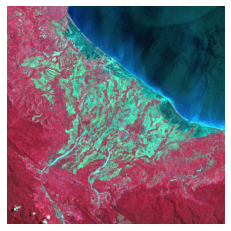

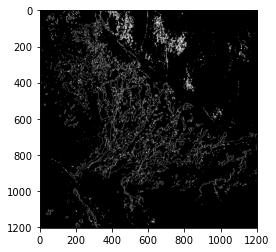

In [2]:
def FiltreLaplacien(stringInputImage):

    # Construction du masque de Laplacien
    masque_laplacien = np.zeros((3,3))
    masque_laplacien[:]=-1
    masque_laplacien[1,1]=8
    
    
    def init(n,m):
        return np.zeros((n, m))
    
    
    img = mpimg.imread(stringInputImage)
    n,m,c=img.shape
    
    img_interpo = img_lapla = init(n+2,m+2) 

    # fonction du filtre Laplacien
    
    i=1
    while i < n-1 :
        j=1
        while j < m-1 :
            img_lapla[i][j] = (img[i-1:i+2,j-1:j+2]*masque_laplacien).sum()
            j+=1
        i+=1
    
    img_lapla[img_lapla>=0] = 0
    img_lapla[img_lapla<0] = 1
    
    #Image de polarité
    
    x=img_lapla.shape[0]
    y=img_lapla.shape[1]
    for i in range(0,x-1):
        for j in range(0,y-1):
            if (img_lapla[i][j] == img_lapla[i][j+1]):
                img_interpo[i][j]=0
            else:
                img_interpo[i][j]=1
        
    
    return img_interpo



lpf=np.array([[1, 1, 1], [1, 1, 1],[1, 1, 1]]) 
lpf=(-1)*lpf
lpf[1][1]=8

print(lpf)
        


# ouverture du fichier image
ImageFile = 'imsat TP3.jpg'#'split.jpg'#'test.jpg'
try:
      imgOG = mpimg.imread(ImageFile)
except IOError:
      print('Erreur sur ouverture du fichier ' + ImageFile)
      sys.exit(1)
# affichage des caractéristiques de l'image
print (imgOG.shape)
Taillex,Tailley,c=imgOG.shape
print("e",Taillex,"r",Tailley)
# affichage de l'image
plt.imshow(imgOG)
plt.axis('off')
plt.show()

#acces au different mtx de chaque color from RGB


#pour scale an loaded pic
#plt.figure(figsize=(8,8))


 

img=FiltreLaplacien(ImageFile)
plt.imshow(img,cmap='gray')
plt.show()

#### b-Sobel

fonctions pour calculer l'amplitude du
gradient et la direction du gradient:

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


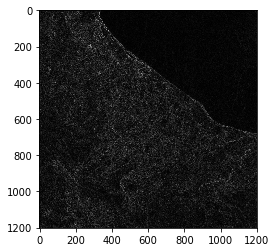

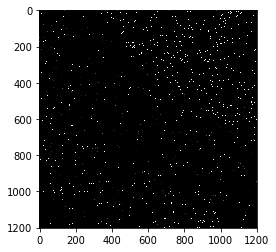

In [11]:
def DirectionETamplitude(gx,gy):
    a=np.sqrt(gx**2+gy**2)#amplitude
    d=np.arctan(gy/gx)#direction du gradiant
    d=d**180/np.pi #conversion vers degre (en int)
    return a,d
                
    
a,d=DirectionETamplitude(gx,gy)
print('amplitude')
plt.imshow(a,cmap='gray')
plt.show()
print('direction')
plt.imshow(d,cmap='gray')
plt.show()

sobel:

(1201, 1201, 3)
e 1201 r 1201


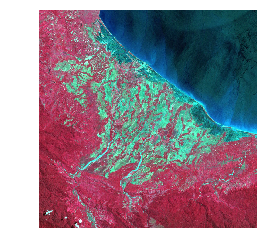

1


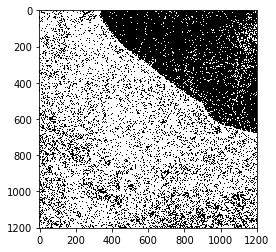

In [12]:
# importation des librairies
from scipy import misc
#import imageio
#write this inst "import ImageOps" to use this inst "gray=imageOps.grayscale(img)" to convert an image to gray lvl (dl an biblio named ImageOps is REQUIRED)
#ce rq precedent est valable pour biblio "Image" with the same requirement
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mplib



#acces au different mtx de chaque color from RGB


#pour scale an loaded pic
#plt.figure(figsize=(8,8))


# Question1

## Q1-1

### gradient sobel


def FiltreGradient(img,hx,hy,se):#img input image
    #k nb des lines ou colone symetrique pour chaque filtre moyenne de taille impair
    #hx est un filtre vertical (comme celle de sobel)
    #hy est un filtre horizontal (comme celle de sobel)
    #se seuil
    #ig=0.21*img[:,:,0]+0.71*img[:,:,1]+0.07*img[:,:,2]
    #ig=0.21*img[:,:,0]+0.71*img[:,:,1]+0.07*img[:,:,2]
    
    se=se
    
    #deduction de k (nb des 2 dans la taille du filtre)
    sizex,sizey=img.shape
    vx,vy=hx.shape
    k=int((vx-1)/2)
    print(k)
       
    
    
    #imag final
    ir=np.zeros([sizex, sizey])

    
    #amplitude image
    t=np.zeros([sizex, sizey])
    #direction du gradient image
    d=np.zeros([sizex, sizey])
    
    #gradient x
    gx=np.zeros([sizex, sizey])
    #gradient y
    gy=np.zeros([sizex, sizey])
    
    #gradient total
    g=np.zeros([sizex, sizey])
    
    i=0
    j=0
    
    c=0
    for c in range(3):
        x=0
        while(x<=(sizex-k-1)):##aproche avec effet de contour
            y=k
            
            while(y<=(sizey-k-1)):
                gx[x,y]=0
                gy[x,y]=0
                i=0
                ii=k
                #DEBUT PARCOURS VOISIN
                ######################
                while(ii>=(-1)*k):##aproche avec effet de contour
                    j=0
                    jj=(-1)*k
                    while(jj<=k):
                        gx[x,y]=gx[x,y]+img[int(x+ii),int(y+jj)]*hx[i,j]
                        gy[x,y]=gy[x,y]+img[int(x+ii),int(y+jj)]*hy[i,j]
                        #print(x,y,ii,jj)
                        jj=jj+1
                        j=j+1
                    ii=ii-1
                    i=i+1
                #FIN PARCOURS VOISIN
                ####################
                g[x,y]=np.sqrt(gx[x,y]**2+gy[x,y]**2)
            
                #print(s)
                if(g[x,y]>=se):
                    ir[int(x),int(y)]=1
                else:
                    ir[int(x),int(y)]=0
                        
                #print(x,y,s,ir[int(x),int(y)])
                y=y+1
            x=x+1
   
    
    
    mpimg.imsave("test-GRAD-after.jpg",ir);  #if not work use "gray");
    return gx,gy,ir        


#sobel

hx=np.array([[1, 0,-1],
             [2, 0,-2],
             [1, 0,-1]]) 

hy=np.array([[ 1, 2, 1],
             [ 0, 0, 0],
             [-1,-2,-1]]) 
        


# ouverture du fichier image
ImageFile = 'imsat TP3.jpg' #'split.jpg'
try:
      img = mpimg.imread(ImageFile)
except IOError:
      print('Erreur sur ouverture du fichier ' + ImageFile)
      sys.exit(1)
# affichage des caractéristiques de l'image
print (img.shape)
Taillex,Tailley,z=img.shape
print("e",Taillex,"r",Tailley)
# affichage de l'image
plt.imshow(img)
plt.axis('off')
plt.show()

    
gx,gy,img=FiltreGradient(img[:,:,0],hx,hy,35)#50 pour split)

plt.imshow(img,cmap='gray')
plt.show()


### 3)Comparaisson des deux filtres
#le sobel est beaucoup mieux que laplacien a cause de la sensibilité au bruit de laplacien.
    en detailles:
#Comparaisson entre les deux images contours : 
#Sobel: Contour epais. si on applique le filtre Sobel
sur une image bruité le resultat sera bon et donc on conclue que le filtre Sobel n’est sensible au
bruits.
#Laplacien: Contour discontinue. si on applique le filtre Laplacien sur une image bruité le resultat
sera trés mauvais et donc on conclue que le filtre Laplacien est sensible au bruits.

#Donc: On remarque un changement du type de contour (epais-discontinue).le filtre Laplacien est
sensible au bruits alors que le filtre Sobel n’est sensible au bruits. on remarque aussi que le filtre
Laplacien est legérement meilleur que le filtre Sobel a cause de la polarité.

#Pour y remédier au problème: Sobel si seuil >>> alors contour discontinue. solution: chainage de
contour si seuil <<< alors contour epais. sulution: Aminissement du contour Laplacien Dans la
matrice de polarisations si les 0000 sont majoritaire alors il faut changer le suil ou bien changer le
filtre. Dans la matrice de polarisations si les 1111 sont majoritaire alors il faut faire un Aminissement
du contour


## Etape 2 : Segmentation

### 1) Méthode de segmentation

split.jpg:


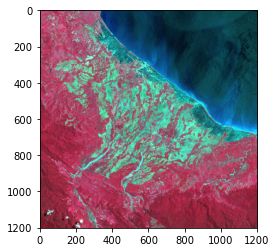

[[[201  80 125]
  [203  82 127]
  [207  86 131]
  ...
  [ 15  58  64]
  [ 19  62  68]
  [ 11  61  62]]

 [[203  73 119]
  [204  74 120]
  [210  80 126]
  ...
  [ 13  56  62]
  [ 20  63  69]
  [ 13  63  64]]

 [[212  72 121]
  [220  80 129]
  [216  78 127]
  ...
  [  7  50  56]
  [ 13  53  61]
  [ 11  61  62]]

 ...

 [[125  38  47]
  [153  67  76]
  [116  36  45]
  ...
  [157  48  67]
  [165  54  73]
  [170  56  79]]

 [[127  40  49]
  [128  42  51]
  [109  29  38]
  ...
  [171  60  79]
  [173  60  80]
  [162  55  75]]

 [[132  35  44]
  [133  38  46]
  [124  31  41]
  ...
  [164  48  71]
  [180  56  82]
  [166  55  72]]]


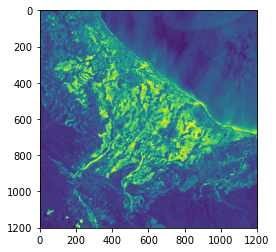

minimas [1, 34, 42, 48, 50, 66, 69, 84, 90, 95, 97, 100, 108, 114, 125, 149, 154, 160, 165, 167, 233, 240, 242, 247, 251]


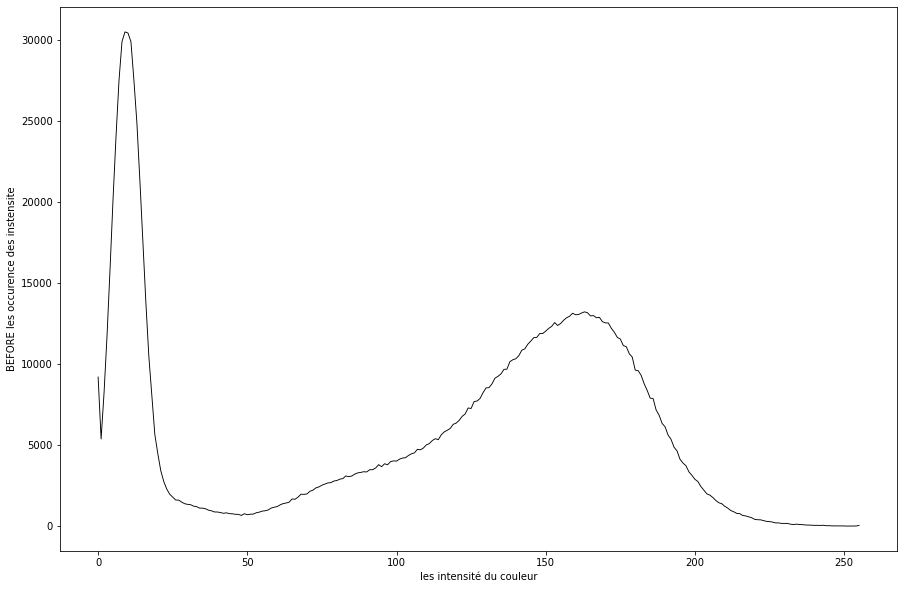

[(1, 34), (34, 42), (42, 48), (48, 50), (50, 66), (66, 69), (69, 84), (84, 90), (90, 95), (95, 97), (97, 100), (100, 108), (108, 114), (114, 125), (125, 149), (149, 154), (154, 160), (160, 165), (165, 167), (167, 233), (233, 240), (240, 242), (242, 247)]
minimas [1, 5, 10, 58, 61, 69, 86, 100, 105, 110, 114, 116, 128, 136, 141, 143, 145, 147, 149, 152, 154, 156, 158, 162, 165, 169, 173, 175, 178, 180, 184, 187, 190, 193, 195, 200, 202, 205, 215, 222, 224, 228, 232, 236, 239, 242, 244, 247]


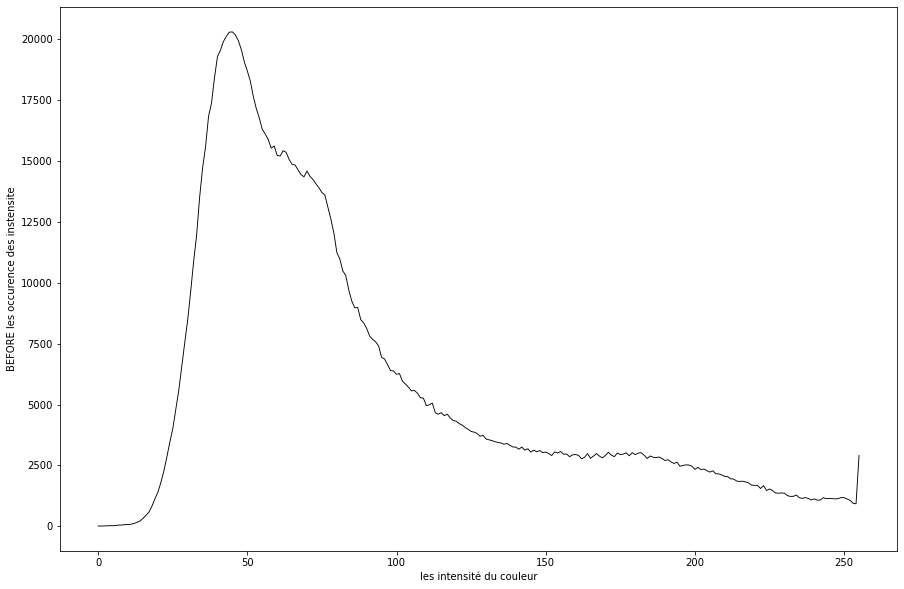

[(1, 5), (5, 10), (10, 58), (58, 61), (61, 69), (69, 86), (86, 100), (100, 105), (105, 110), (110, 114), (114, 116), (116, 128), (128, 136), (136, 141), (141, 143), (143, 145), (145, 147), (147, 149), (149, 152), (152, 154), (154, 156), (156, 158), (158, 162), (162, 165), (165, 169), (169, 173), (173, 175), (175, 178), (178, 180), (180, 184), (184, 187), (187, 190), (190, 193), (193, 195), (195, 200), (200, 202), (202, 205), (205, 215), (215, 222), (222, 224), (224, 228), (228, 232), (232, 236), (236, 239), (239, 242), (242, 244)]
minimas [0, 2, 6, 10, 12, 14, 22, 66, 74, 76, 79, 82, 90, 92, 95, 97, 100, 102, 107, 112, 117, 119, 121, 127, 142, 146, 149, 152, 155, 157, 164, 167, 186, 188, 190, 200, 203, 212, 221, 223, 229, 231, 237, 240, 245, 247]


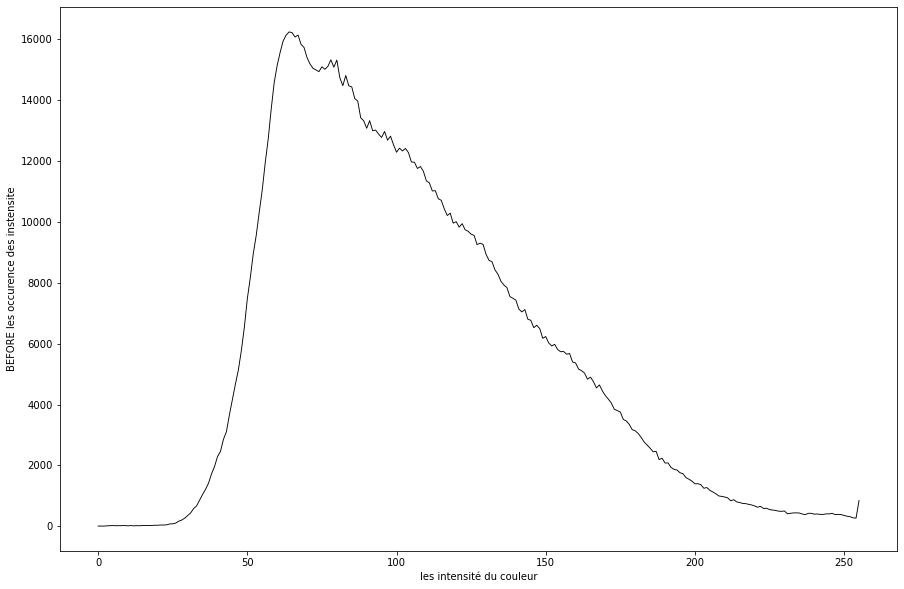

[(0, 2), (2, 6), (6, 10), (10, 12), (12, 14), (14, 22), (22, 66), (66, 74), (74, 76), (76, 79), (79, 82), (82, 90), (90, 92), (92, 95), (95, 97), (97, 100), (100, 102), (102, 107), (107, 112), (112, 117), (117, 119), (119, 121), (121, 127), (127, 142), (142, 146), (146, 149), (149, 152), (152, 155), (155, 157), (157, 164), (164, 167), (167, 186), (186, 188), (188, 190), (190, 200), (200, 203), (203, 212), (212, 221), (221, 223), (223, 229), (229, 231), (231, 237), (237, 240), (240, 245)]


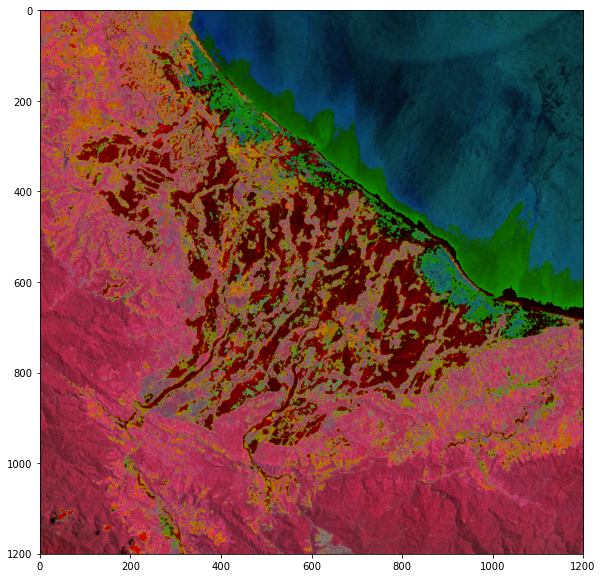

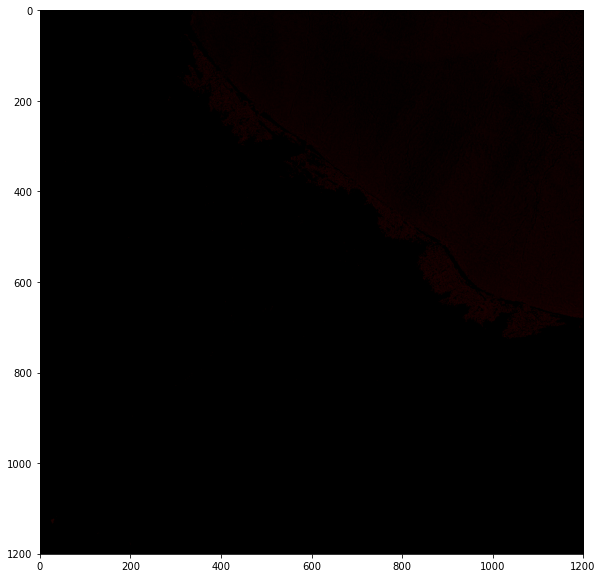

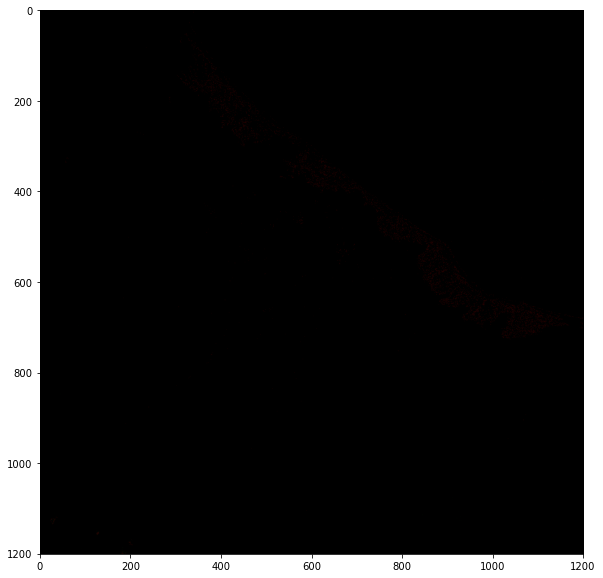

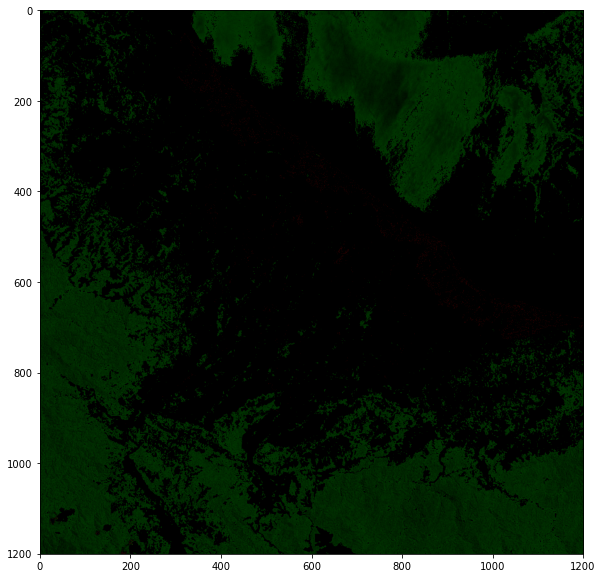

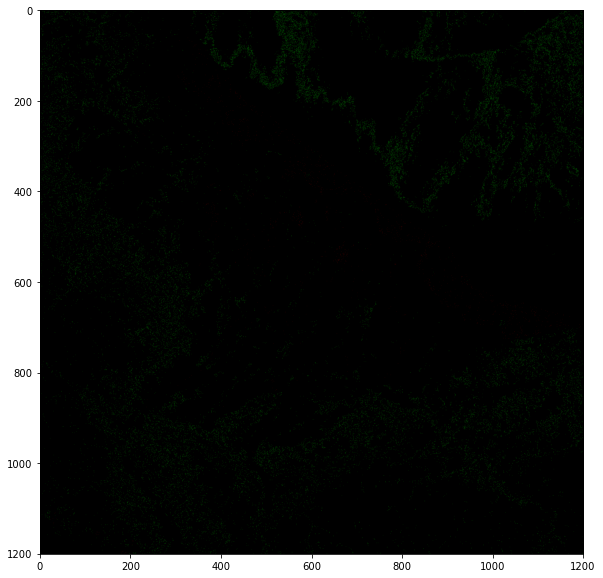

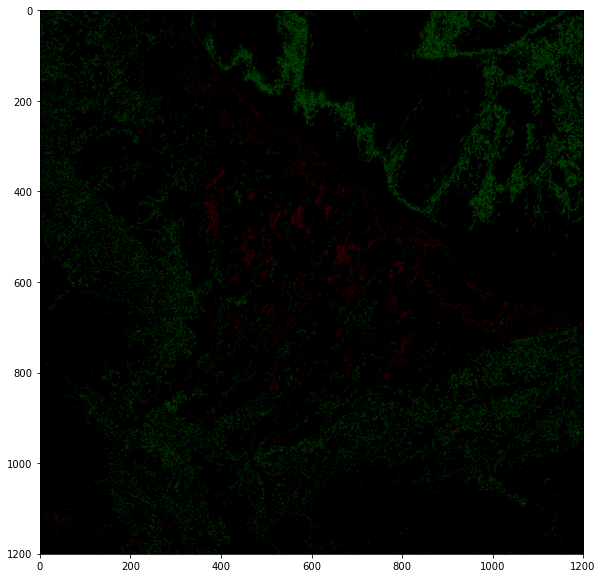

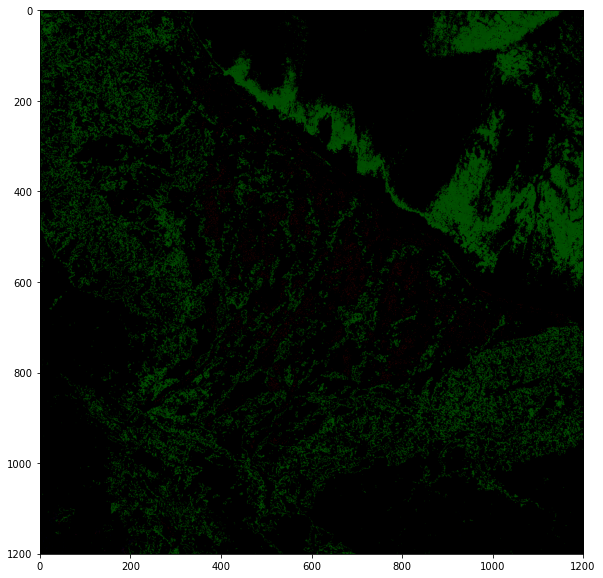

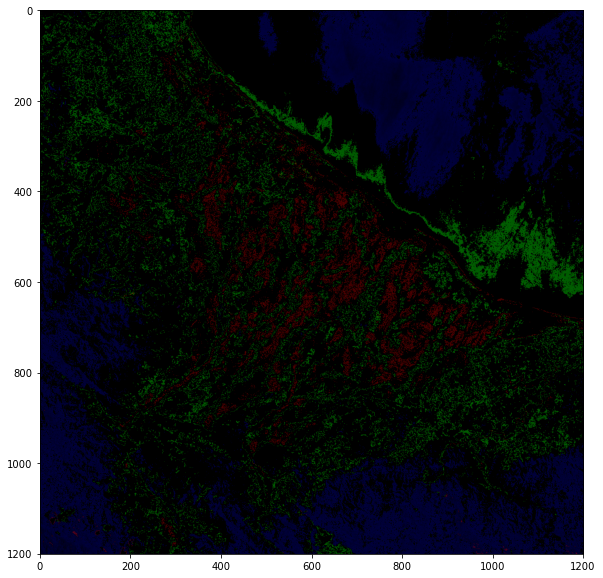

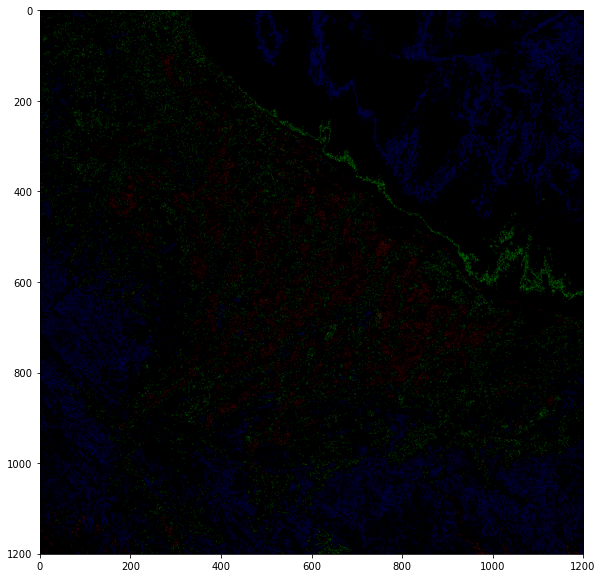

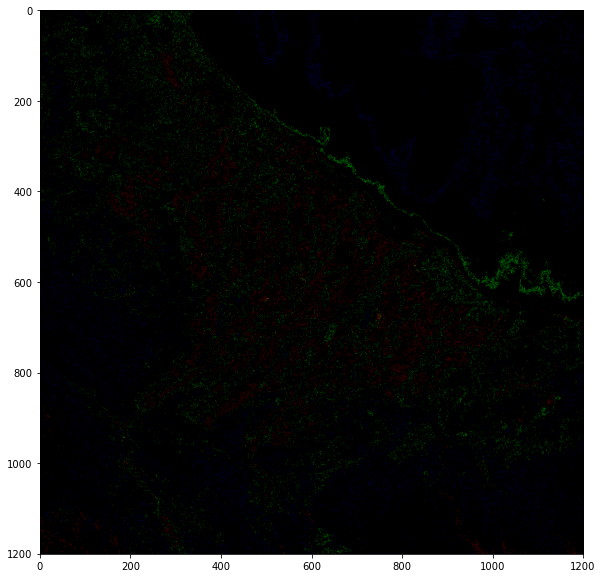

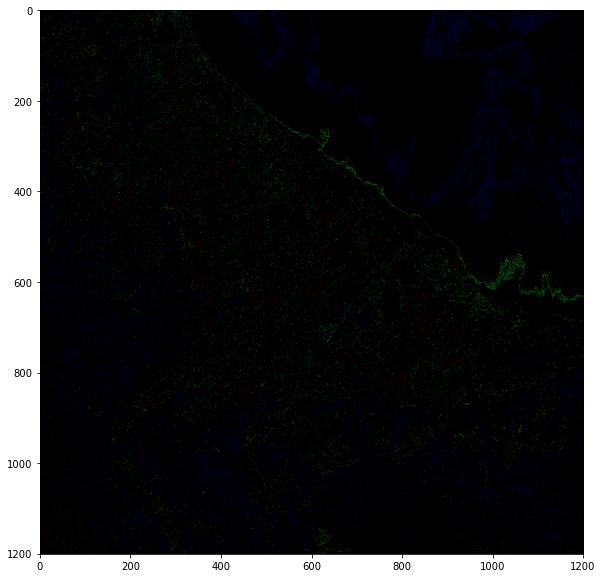

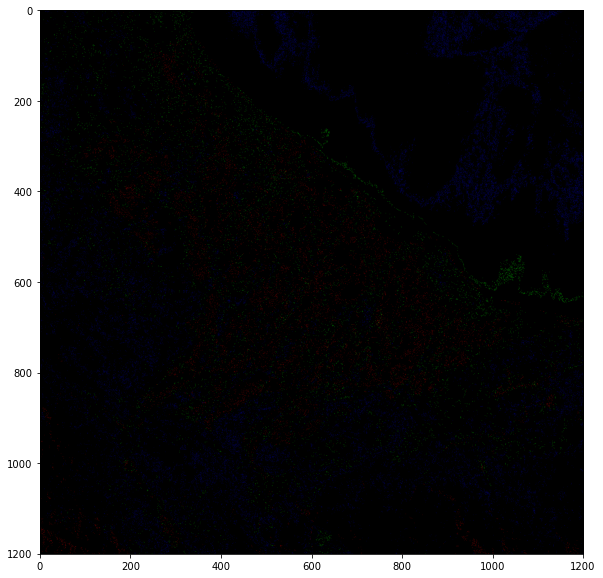

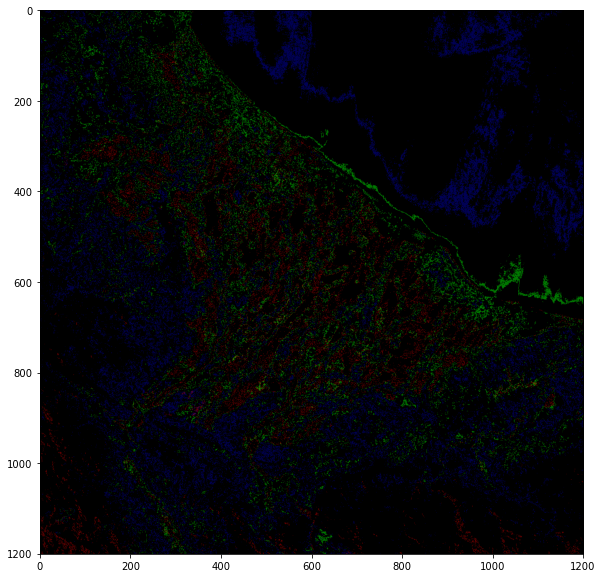

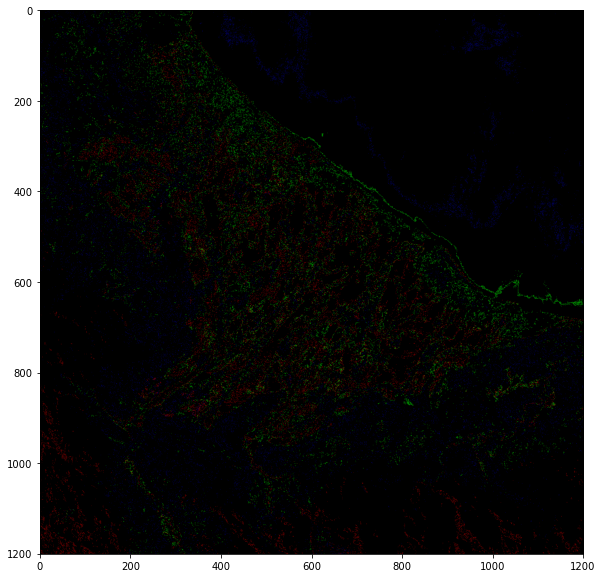

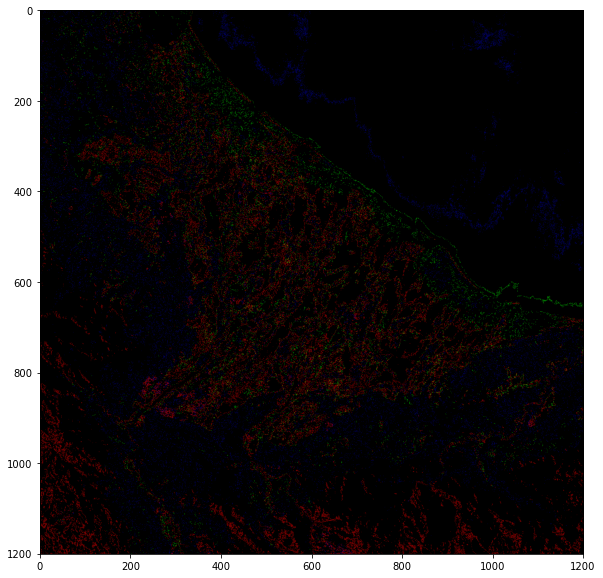

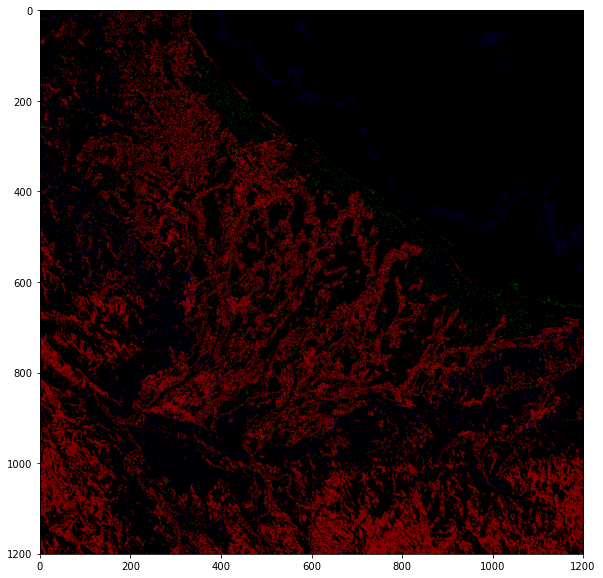

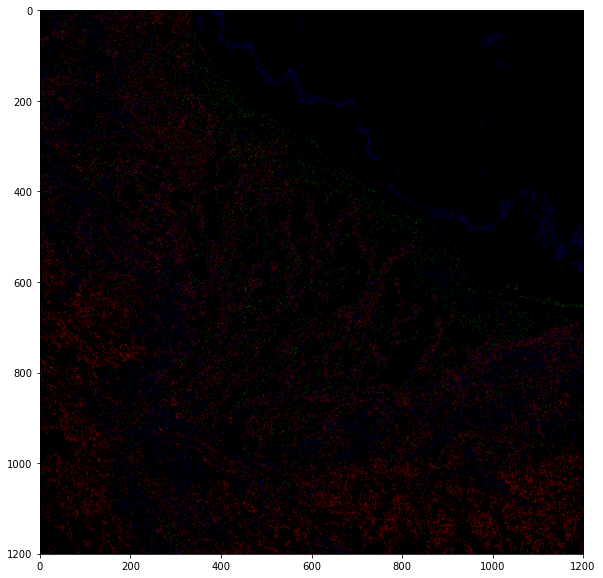

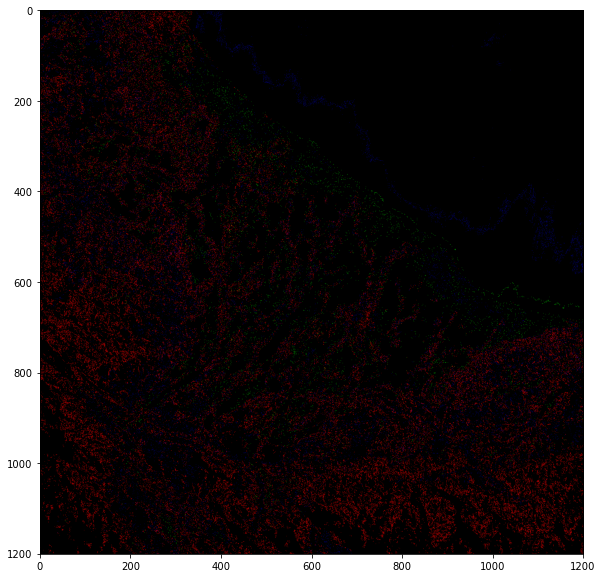

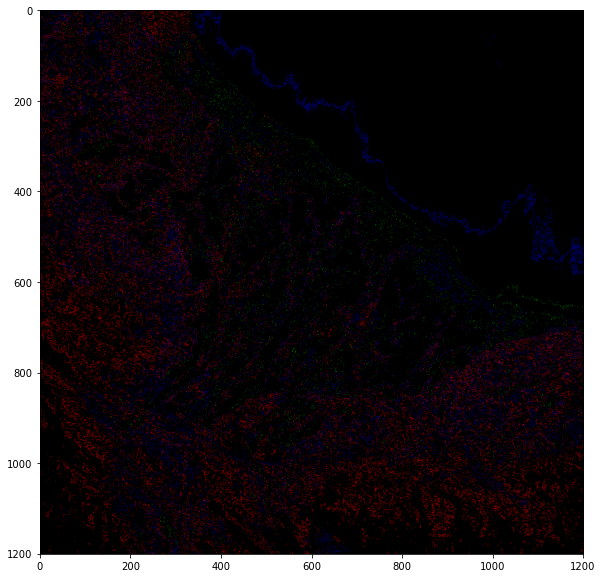

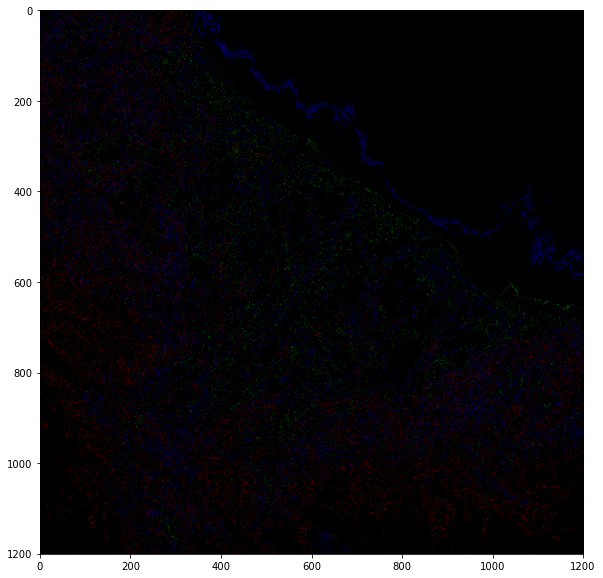

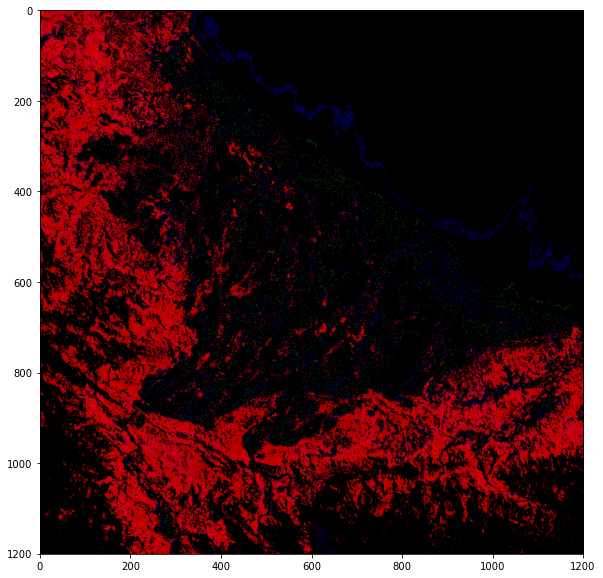

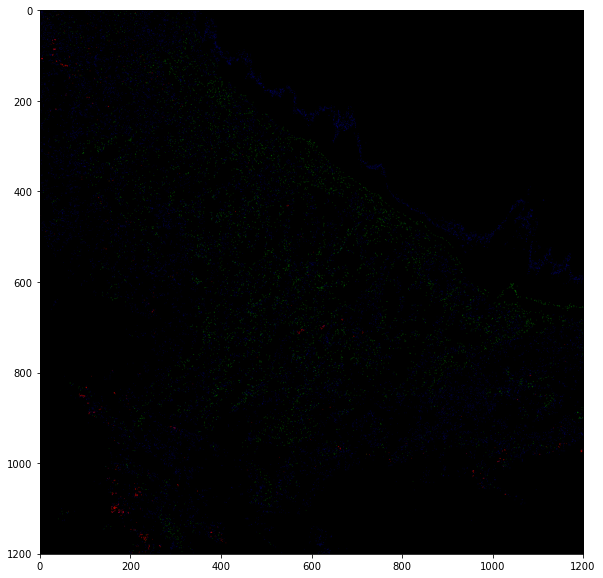

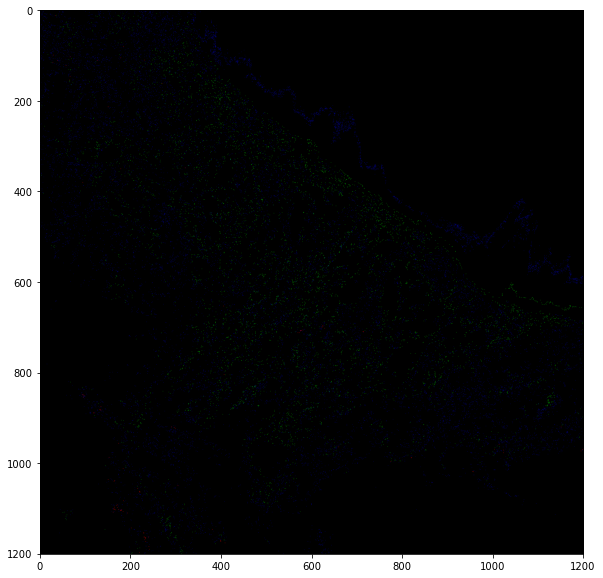

In [2]:
# Etape1 : ouverture des images satellitaires

# importation des librairies
from scipy import *
#import imageio
#write this inst "import ImageOps" to use this inst "gray=imageOps.grayscale(img)" to convert an image to gray lvl (dl an biblio named ImageOps is REQUIRED)
#ce rq precedent est valable pour biblio "Image" with the same requirement
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mplib
import math




def ReadAffiche(ImageFile):###fonction de lecture d'image 
    try:
            img = mpimg.imread("imsat TP3.jpg") #ImageFile est un chaine de caracteres d'image d'entrée avec  
                                            #point suivi de son extension et eventuellement with avec le repertoire
                                            ##img est un 
                                            ##matrice 3d (ne veut pas dire modele 3d) mais 
                                            ##contient successivement
                                            #dans la 1er dimension:coordonné x du pixel
                                            #dans le 2eme dimension:coordonné y du pixel
                                            #dans le 3eme dimension:niveau couleur du pixel
    
    except IOError: ##le cas si fichier a lire est inexistant
        print('ERREUR ,l\'image:' + ImageFile+'NON trouvé')
        sys.exit(1)
    
    # affichge du titre d'image
    print(ImageFile+":")
    
    # affichage de l'image
    plt.imshow(img)
    plt.show()
    return img##retour d'image lue en tant que matrice au 3axes (pas en tant que modele 3d) qui contient successivement
                #dans la 1er dimension:coordonné x du pixel
                #dans le 2eme dimension:coordonné y du pixel
                #dans le 3eme dimension:niveau couleur du pixel

            
            
            
def Seuillage(img,threshold): #tableau d'occurence des intesités du couleur
                    #img est une matrice image d'entré
                    #s=seuil de couleur en instensite rgb [0,255]    
    
    


    def hisPlot(occ,clr):#clr est le stirng de couleur peut etre soit 'red",'green','blue'
        plt.rcParams["figure.figsize"] = [15,10] ##change le taille du figure par format d'image (proportions)
                                                 #(la taille d'image qui englobe 
                                                 #tous les element tel que:
                                                 #le plot,les axe mais pas la legende)
                                                 ## pas seulment la courbe au sens du 
                                                 #la multiplication du fonction mathematiquement par un scalaire
                                                 #si egale [15,10] on aura hd-like representaion

        index=np.arange(256) ###un tablau 1d pour les valeur possible du niveau de couleur
                                #temporaire utilisé pour racourcir un peu le code

        plt.plot(index,occ[index],color=clr, linewidth=0.9) ###mise en scene du courbe occR (nombre 
                                                                ##d'occourence du niveau du couleur 
                                                                ##rouge) en fonction index et 
                                                                ##epaisseur 0.9 (defualt est 1) (j'ai un 
                                                                ##peu raccouci pour
                                                                ##une meilleur precision)


        plt.xlabel('les intensité du couleur')
        plt.ylabel('BEFORE les occurence des instensite')
        plt.show()

    

    ir=[]
    largeur,hauteur=img.shape ### attribution des variable avec des valeur de l'image d'entrée 

    occ=np.zeros(256)#occR=occurence de niveau de rouge

    occPt=[[] for i in range(256)]#occpt est l'ensemble des points repartie en fonction
                                        #les intensite de colueur a partir d'un histograme (equalize ou non
    ##########CREATION d'axe de occurence de niveau de couleur
#print(clr) pour le debogage

    ###parcour des pixel par pixel par 2 boucle imbrique (premier en largeur et 2eme en hauteur)

    x=0   #initialison coordonné x
    while(x<largeur): #condition d'arret du coordonné x pour eviter l'overflow 
        #print("while")
        y=0 #initialison coordonné y
        while(y<hauteur):#condition d'arret du coordonné y pour eviter l'overflow
            #print(x,y) #pour le debogage
            occ[int(img[x,y])]=occ[int(img[x,y])]+1 ##incrementation d'occurence au un niveau de couleur ROUGE donné au 
                    #occR[niveau de couleur deja en entier]
            occPt[int(img[x,y])].append([x,y]) ##incrementation d'occurence au un niveau de couleur ROUGE donné au 
            y=y+1
        x=x+1    


    ######################
    #DETECTION DE minimas#
    ######################


    minimas=[]

    ############cas intesité=1
    i=0
    if(occ[i] <occ[i+1]):
            minimas.append(i)
    ############cas intesnité entre 2 et 255 

    for i in range(1,254):
        if(occ[i-1]>occ[i] and occ[i] <occ[i+1]):
            minimas.append(i)

    ######### cas intensite =256
    i=255
    if(occ[i-1]>occ[i]):
        minimas.append(i)

    ###########test
    print("minimas",minimas)



    #print(clr)
        ###increment d'intesite du colueur si il existe dans coordonnées x,y d'image d'entrée 
    ###creation du 2nd axe (axe horizontal) pour les intensite couleur au niveau de gris avec pas de 1


    nbPxTotal=largeur*hauteur

    ##Creation du cdf
    edf=np.zeros(256)

    chdf=np.zeros(256)

    s=0
    S=0

    hisPlot(occ,'black')

    #########################################################
    #CLASSIFICATION how to classes intesnisty to sous images#
    #########################################################
    classes=[]
    for cl in range (0,len(minimas)-1-1 ):
        classes.append( (minimas[cl],minimas[cl+1]) )

    print(classes)

    segments=[]

    for k in range(len(classes)-1):
        icurrent,inext=classes[k]
        sgmt=np.zeros((img.shape))
        #############detect les 2 point extremum pour rogner le segment courant
        maxX,maxY=img.shape[0]+1,img.shape[1]+1
        minX,minY=-1,-1
        for i in range(icurrent,inext):
            for j in range(0,len(occPt[i])):     
                x,y=occPt[i][j]
                if(x>maxX):
                    maxX=x
                if(x>maxY):
                    maxY=y

                if(x<maxX):
                    minX=x
                if(y<minY):
                    minY=y
                sgmt[x,y]=i


        segments.append(sgmt)
    return segments

ImageFile = 'split.jpg'#'mini.jpg'
imgILL=ReadAffiche(ImageFile)

#imgILL=(imgILL[:,:,0] +imgILL[:,:,1] + imgILL[:,:,2])/3 ###moyenne des intensités RGB
print(imgILL)
plt.imshow(imgILL[:,:,1]/255.0)
plt.show()



R=Seuillage(imgILL[:,:,0],50)
G=Seuillage(imgILL[:,:,1],50)
B=Seuillage(imgILL[:,:,2],50)
#print(SimgILL)

ir=np.zeros((imgILL.shape[0],imgILL.shape[1],3))



####colorifer les classe obtenu par niveau
finalclasses=[]
chk=np.zeros((imgILL.shape[0],imgILL.shape[1],3))#img de verification
chk=chk.astype(np.uint8)
for k in range (len(R)):
    final=np.zeros((imgILL.shape[0],imgILL.shape[1],3))#classe en couleur
    final[:,:,0]=R[k][:,:]
    final[:,:,1]=G[k][:,:]
    final[:,:,2]=B[k][:,:]
    finalclasses.append(final.astype(np.uint8))
    chk=chk+final
    #pour verifier il suffit de fair la somation de tous les classes coloré car les classes sont distinctes (n'ont pas)
    #generalment de points communs (dans ce contexte de cet algorithme sont des point colorés)

plt.imshow(chk/255)
plt.show()       


for i in range (len(finalclasses)):
    plt.imshow(finalclasses[i]/255)
    plt.show()                
                

#### 2)  On a choisi la 1ére méthode: entres les minimas
    cette approche consite: 
    pour chaque canal (Histogramme) :
    deb boucle
        #1-a detecter tous les minimas des histogrammes
        #2-les sueils sont ces minimas detectes 
        #3-on fabrique tous les couple C de 
                        #(minima actuel ,minima suivant) possibles appéle classes (suelment 2 minimas succesives)
        #4-puis on fait un ensemble D de distribution les pixels d'image selon les intesnites (on utilise le look up table d'equalization d'hisotgrame) 
        #5-on fabrique des classes K (en forme d'images partiels (une classe k= une image partiel) ) par la division l'ensemble D par C (les couples de minimas) cad
                # chaque 2 minimas succesives on prend les pixels qui sont situés entres ces 2 minimas ,on mets 
                    #ces pixels dans une classe cl ##########avec leur niveu de gris d'origine (pour chaque cl dans K)
     fin boucle
    #6-on assembles pour chaque classes les 3 niveau de couleur pour avoir la meme classe en rgb dans une image final f (on repete pour tout les classes)
    #7-affichage du resultat
    ####OPTIONAL (verififcation de resultats):
        pour verifier les classe ont été correctement formés
        on fait la somation de tous les classes K dans un seul image "CHK"

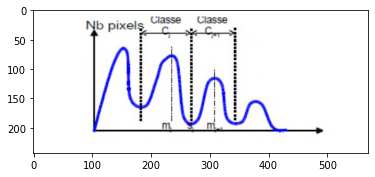

In [3]:
from PIL import Image
imgpil = Image.open("01.png") 
plt.imshow(imgpil) 

#### 3) limites :
#1-sensible au bruit d'histogrames (les series de leger changement de points d'hauteur de pic autour de 0-255 dans l'intensité' dans les histograme entre les pic signifiant(cell avec grand changment de points) )
#2-un peu lent a cause edu 1er cause
#3 *peut etre consideré comme une limite* il semble que les class on un peu des points communs superposés entres les classes (la partie des couleur erronés dans l'mage de verification "CHK" ) car les sommes des point communs pour n'importe quelle chaine couleur on depassé 255 (en int format) ou 1 en float format (l'intesnité maximum est depassé)

## Etape 3 : Classification

### 1) Fonction Kmeans :

<>:113: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:113: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-1-f8f7c259aa02>:113: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  while(t<maxlter and converge is not 1):


imsat TP3.jpg:


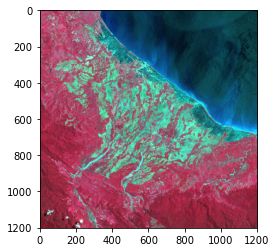

[((149, 449), 8), ((265, 330), 124), ((1128, 564), 175), ((769, 689), 119), ((891, 71), 150), ((23, 835), 2), ((238, 577), 12), ((1169, 85), 112), ((480, 583), 97), ((267, 967), 10), ((514, 4), 156), ((36, 208), 147), ((484, 1149), 17), ((1191, 912), 162), ((1010, 619), 159), ((521, 437), 101), ((389, 238), 122), ((772, 1000), 186), ((646, 893), 23), ((159, 869), 7), ((13, 1097), 13), ((295, 723), 10), ((1142, 341), 153), ((554, 1138), 17), ((241, 687), 10), ((440, 103), 197), ((90, 1010), 13), ((1131, 878), 152), ((71, 1156), 8), ((1127, 930), 79)]
[((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0), 201), ((0, 0),

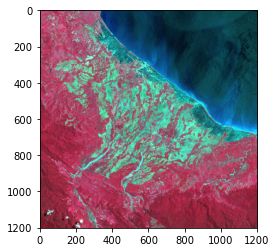

[((149, 449), 8), ((265, 330), 124), ((1128, 564), 175), ((769, 689), 119), ((891, 71), 150), ((23, 835), 2), ((238, 577), 12), ((1169, 85), 112), ((480, 583), 97), ((267, 967), 10), ((514, 4), 156), ((36, 208), 147), ((484, 1149), 17), ((1191, 912), 162), ((1010, 619), 159), ((521, 437), 101), ((389, 238), 122), ((772, 1000), 186), ((646, 893), 23), ((159, 869), 7), ((13, 1097), 13), ((295, 723), 10), ((1142, 341), 153), ((554, 1138), 17), ((241, 687), 10), ((440, 103), 197), ((90, 1010), 13), ((1131, 878), 152), ((71, 1156), 8), ((1127, 930), 79)]
classement
classe 1


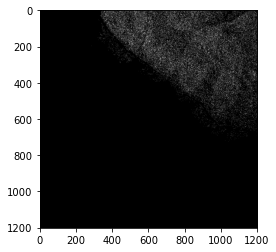

classe 2


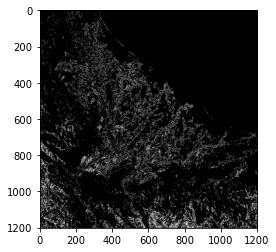

classe 3


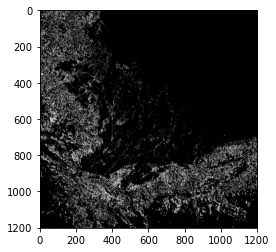

iter 0
WORK IN PROGRESS
FINI


In [1]:
# Etape1 : ouverture des images satellitaires

# importation des librairies
from scipy import *
#import imageio
#write this inst "import ImageOps" to use this inst "gray=imageOps.grayscale(img)" to convert an image to gray lvl (dl an biblio named ImageOps is REQUIRED)
#ce rq precedent est valable pour biblio "Image" with the same requirement
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mplib
import math




def ReadAffiche(ImageFile):###fonction de lecture d'image 
    try:
            img = mpimg.imread("imsat TP3.jpg") #ImageFile est un chaine de caracteres d'image d'entrée avec  
                                            #point suivi de son extension et eventuellement with avec le repertoire
                                            ##img est un 
                                            ##matrice 3d (ne veut pas dire modele 3d) mais 
                                            ##contient successivement
                                            #dans la 1er dimension:coordonné x du pixel
                                            #dans le 2eme dimension:coordonné y du pixel
                                            #dans le 3eme dimension:niveau couleur du pixel
    
    except IOError: ##le cas si fichier a lire est inexistant
        print('ERREUR ,l\'image:' + ImageFile+'NON trouvé')
        sys.exit(1)
    
    # affichge du titre d'image
    print(ImageFile+":")
    
    # affichage de l'image
    plt.imshow(img)
    plt.show()
    return img #retour d'image lue en tant que matrice au 3axes (pas en tant que modele 3d) qui contient successivement
                #dans la 1er dimension:coordonné x du pixel
                #dans le 2eme dimension:coordonné y du pixel
                #dans le 3eme dimension:niveau couleur du pixel

            
                
    
def kmeans(xi,K):#xi =input set of point aka input img
                    #k=nb of classes
    
    m,n=xi.shape #on fait ça pour que apres la fin d'execution de kmeans pour
                    #convertire 1d to 2d 
    #convert imag from 2d to 1d par fonction flatten()
    #xi=xi.flatten()
    
    t=0 #iteration
    
    #init centre de clases

    
    z=np.zeros((m,n,K))#output found classes
    
    
    #    centres=np.zeros((K))
    #centres=[(50,50,xi[50,50]),(1100,1100,xi[1100,1100]),(625,625,xi[625,625])]#centres representé par les tuples (x,y,imageENTRÉE[x,y])
    
    centres=[]
    tempcentres=[]
    for k in range(K):
        x=int(np.random.randint(0,m-1) )
        y=int(np.random.randint(0,n-1) )
        centres.append(   ( (x,y),xi[x,y] )  )
        tempcentres.append(    ( (0,0),xi[0,0] )  )
    
    print(centres)
    
    #tempcentres=[(0,0,xi[0,0]),(0,0,xi[0,0]),(0,0,xi[0,0])]#sert comme variable temporair pour comparer les ancienes centre avec les
                                                                            #les centre actuells
    
    print(tempcentres)
    
    
    plt.imshow(z[:,:,0], cmap='gray')
    #plt.show()

    plt.imshow(z[:,:,1], cmap='gray')
    #plt.show()

    plt.imshow(z[:,:,2], cmap='gray')
    #plt.show()
    
    
    print(xi)
    #for i in range(K):
    #    centres[i]=np.abs( int(len(xi)-(i+2)**2 ) )# get two random indexes)
        #centres[i]=list(xi).index(np.random.rand(len(xi)-1))
        #centres[i]=np.where(xi==np.random.rand(len(int(xi) -1 )  ) ) 
    #est=np.random(6)
    #nb iteration max
    print(centres)
    
    maxlter=10
    
    #seuil de classe
    seuil=1/10**6#epsilon
    

    torsion=0#10**9 #biggest val possible
    
    z=np.zeros((m,n,K))#output found classes

    
    converge=0
    
    while(t<maxlter and converge is not 1):
        
        print(t,"eme iteraiton")
        
        #etape affectation
        ##################
        DIST=[]##distance (centre et point (i,j) d'image d'entrée)
        for i in range(0,m):#par pixel d'image d'entrée
            DIST=[]
            for j in range(0,n ):#par pixel d'image d'entrée
                #print(i,j,k)
                
                DIST=[]
                for k in range(0,K): #par de centres
                    #print(xi[i,j]**2)
                    #print(centres[k][1])
                    DIST.append( np.sqrt( np.abs(xi[i,j]**2-centres[k][1]**2) ) )
                    #print('k is ',k)
                #print(DIST)    
                
                
                arg=DIST.index( min(DIST) )##affectation to closest center (closest k)
                
                z[i,j,arg]=xi[i,j]###marquage du pixel de classe en blanc
                
                
                
                #print('j is',j)
            #print('i is',i)
    
        #recalcule des centres de classes
        ###################   
        for k in range(K):
            sx=0#nouvau centre au x
            sy=0#nouvau centre au y
            d=0#denominant pour les moyennes
            for i in range(m-1):
                for j in range(n-1):
                    if(z[i,j,k]==1):
                        sx=sx+i #equivaut au #sx=sx+1*i -> #sx=sx+z[i,j,k]*i cela permet
                                    #d'alleger l'algorithme
                        sy=sy+j #equivaut au #sy=sy+1*j -> #sy=sy+z[i,j,k]*j
                                    #pour la meme but
                        d=d+1
            
            #affectation de moyenne
            if(d==0):
                sx=0
                sy=0
            else:
                sx=int(sx/d)
                sy=int(sy/d)
            
            tempcentres[k]=(sx,sy,img[sx,sy])
        
            
            
        ##comparaison des centres actuel au ancien centres 
        torsion=0
        for k in range(K):
            if(tempcentres[k][0]==centres[k][0]):
                torsion=torsion+1
            if(tempcentres[k][1]==centres[k][1]):
                torsion=torsion+1
        
        #y=np.zeros((xi.shape))
        
        
        #marquage de nouveau centres
        ############################
        print("new centres")
        y=img.copy()
        y[sx,sy]=0
        plt.imshow(y, cmap='gray')
        plt.show()
        
        #affectation de nouveau centres
        for k in range(K):
            centres[k][0]==tempcentres[k][0]
            centres[k][1]==tempcentres[k][1]
        
        
        print(centres)
        
        
        #affichage de clases par iteration en forme de image
        ###################
        
        print("classement")
        
        print("classe 1")
        plt.imshow(z[:,:,0], cmap='gray')
        plt.show()

        
        print("classe 2")
        plt.imshow(z[:,:,1], cmap='gray')
        plt.show()

        
        print("classe 3")
        plt.imshow(z[:,:,2], cmap='gray')
        plt.show()
        
        #verification des distance entre les anciennes centres et les nouvaue centres
        #############################################################################
        
        print('iter',t)
        print('WORK IN PROGRESS')
        
        if(torsion==0):#or t>=maxlter ):
            t=maxlter+2
            converge=1
            print("FINI")
             #return z,centres

            #converge=1
        
        
        
        t=t+1

            
            
        
        
    #print(z)
    #z=z.reshape(m,n)
    return z,centres

        
    

    
ImageFile ='imsat TP3.jpg'
img=ReadAffiche(ImageFile)
cls,ctr=kmeans(img[:,:,0],30)#*0.25+img[:,:,1]*0.5+img[:,:,2]*0.25)/255,30)
#print(cls)


#### Analyse:
Les resultats montre clairments trois classe representé avec des nuances en blanc.
    # 1ére classe designe l'eau qui apparaît en bleue au noir dans l'image initiale.
    # 2éme classe designe les zones urbaines et non végétales qui apparaissent en bleu-vert et gris dans l'image initiale.
    # 3éme classe designe la végétation qui apparaît en rouge,rose et marron dans l'image initiale.

fin.